# The Black-Scholes option pricing  formula

In this notebook we will explore the Black-Scholes option pricing formula in Python. 

## Black-Scholes option pricing formula for European call option
We will first provide an implementation of the Black-Scholes option pricing formula for a European Call option. 

Recall that the time-0 price of a European call option with strike $K$ and maturity $T$ in the Black-Scholes model is given by
\begin{align*}
C_0 = S_0 \Phi(d_1) - K e^{-rT} \Phi(d_2), 
\end{align*}
where $S_0$ denotes the stock price at time 0, $r > 0$ is the riskless interest rate, $\sigma > 0$ is the volatility of the stock price and
\begin{align*}
d_1 & = \frac{\log(\frac{S_0}{K}) + (r + 0.5 \sigma^2)T }{\sigma \sqrt{T}}, \\
d_2 & = d_1 - \sigma \sqrt{T}.  
\end{align*}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_call(s0, k, t, r, sigma):
    d1 = (np.log(s0 / k) + (r + 0.5 * sigma**2) * t)/(sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    tmp1 = s0 * norm.cdf(d1, loc=0, scale=1)
    tmp2 = k * np.exp(-r * t) * norm.cdf(d2, loc=0, scale=1)
    price = tmp1 - tmp2
    return price


myprice = black_scholes_call(s0=50, k=50, t=1.0, r=0.05, sigma=0.3)
print('Price of European call option is: {:.4f}'.format(myprice))


Price of European call option is: 7.1156


Next, we will analyse the sensitivity of the European call price with respect to some of the model parameters. 
This can be done analytically (by computing the Greeks), or we can do this by showing some plots.
We will only be considering some plots in this notebook. 

We will choose the following default parameters for now: 
\begin{align*}
S_0 & = 50, \\
K & = 50, \\
T & = 1, \\
r & = 0.05, \\ 
\sigma & = 0.2. 
\end{align*}


### Sensitivity of call price with respect to $S_0$

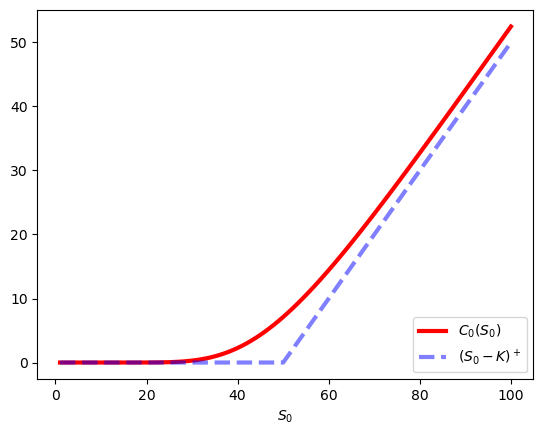

In [2]:
def call_payoff(s, k):
    return np.maximum(s - k, 0)


s0_values = np.linspace(1, 100, 100)
sensitivity_s0 = black_scholes_call(s0=s0_values, k=50, t=1.0, r=0.05, sigma=0.3)
mypayoff = call_payoff(s=s0_values, k=50)

fix, ax = plt.subplots(1, 1)
ax.plot(s0_values, sensitivity_s0, lw=3, c="red", label="$C_0(S_0)$")
ax.plot(s0_values, mypayoff, lw=3, c="blue", label="$(S_0 - K)^+$",
        linestyle="dashed", alpha=0.5)
ax.legend(loc="lower right")
ax.set_xlabel("$S_0$");